# I535 Course Project - Big Data Concepts: Crack the WINE Code!

### 1. Introduction


Wine quality is a complex notion influenced by a range of elements such as grape varietal, soil conditions, weather patterns, and winemaking procedures. Wine's physicochemical qualities, such as acidity, pH, alcohol concentration, and tannin levels, are also important in defining its quality. Wine quality is often evaluated by sensory analysis by experienced specialists who examine the wine's appearance, aroma, flavor, and texture. This traditional approach, however, can be time-consuming, costly, and subjective. As a result, there is a rising interest in building predictive algorithms capable of reliably assessing wine quality based on its physicochemical qualities. Such ML models have the potential to improve winemaking practices, increase consumer pleasure, and provide information about the wine business which proves insightful in making decisions.


Predicting wine quality has a number of advantages for producers, aficionados like me, and the business as a whole. Winemakers can improve production procedures and develop new strategies to increase wine quality by determining the appropriate physicochemical properties that contribute to high-quality wine. As a result, manufacturers may prevent mistakes which will save tons of money along with increasing client happiness and loyalty by making wines that are tailored to their tastes. Adding to this, the ability to predict wine quality can provide winemakers with a advantage in the competitive market by allowing them to produce quality wines that emerges as one of the best. It also provides significant insights into customer tastes and industry trends, assisting makers in producing new products to meet changing demands and gain market share.


### 2. Background


Wine quality is an important aspect of the wine industry, but it is often not given the attention it deserves. As a result, some winemakers struggle to produce wines that meet consumer preferences (quality degradation), leading to decreased sales and having no competitive edge in the market. Recognizing the importance of wine quality, I chose to work on this topic as my project to understand the factors that contribute to top quality wines and build a predictive model that can accurately predict wine quality. My interest in this topic stems from my love of wine and my observation of the challenges wine manufacturers face in producing high-quality wines. Furthermore, I have observed a lack of understanding among consumers regarding the factors that contribute to wine quality. Many people believe that a wine's price reflects its quality, although this is not necessarily true. By devising a prediction model for wine quality, I intend to not only help winemakers improve their operations, but also educate customers on the fundamental variables that go into making a wonderful wine.

### 3. Methodology


To accomplish the task of predicting wine quality, I followed a systematic methodology that involved several steps. The first step was to gather relevant data related to wine quality, including physicochemical attributes such as pH, acidity, and alcohol content, as well as sensory attributes such as taste and aroma. I used **Wine Quality** Dataset from Kaggle developed by **M YASSER H** . Link for the dataset: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset. 

Now that we have the relevant dataset, we need appropriate ways to preprocess it and pass it through the model for prediction and evaluation. Preprocessing here would be data cleaning (outliers, imbalance target variable, etc.), then exploratory data analysis so we can have visuals and may find patterns which play an important role in the analysis. Here, we are not only focused on just developing a ML algorithm but also maintain a system which have the ability to process multiple requests at a time (parallely or concurrently), having no delay and give the necessary prediction. Well to address these, I would just go ahead and be thankful to this course which have all the solutions already.

Firstly, the preprocessing task for having everything done sequentially and in a well-timed manner we will be using **Pipelines** which was taught in the **'Lifecycles and Pipelines'** Module. Utilization of Pipelines will streamline our data processing. With 11 input variables and 1 output variable, we needed to make sure our data was appropriately preprocessed and feature engineered before it was fed into our prediction model. We were able to automate data gathering, preprocessing, feature engineering, and model prediction processes using Pipelines. We will be able to scale this application and distribute tasks over multiple clusters for faster processing. Effective handling of data and analysis of mass volume could be possible with the help of Pipelines, resulting in a very accurate wine quality prediction model.

Now, we need an approach with the help of which we can process multiple requests concurrently. And without any doubts, the solution was provided in the **'Processing and Analytics'** Module in the form of **Apache Spark**. Apache Spark is a sophisticated and fast open-source data processing framework that can handle batch and real-time processing. Apache Spark can work in parallel due to its capacity to construct numerous clusters and distribute jobs among them, allowing for faster and more efficient real-time processing of results. This makes it a great tool in a big data project, where the volume of data to be analyzed might be massive, and the speed with which predictions are made can make a substantial difference in the efficiency of the wine production process.

Although at this moment we are not at the stage of deployement. However if we want to (assuming the application is ready and tested, we need a server to pass the data into the application and enable users to access it. However, using personal computers or laptops as servers may not be sufficient to process all the requests and scale the application. To address this issue, we utilized **JetStream2**, a virtualization platform taught in the **'Virtualisation'** Module of the course. JetStream2 enables us to initialize instances that can act as servers and can be used to deploy the application. Additionally, during the coursework, I made use of the Ubuntu Image Instance in the "Processing and Analytics" module, which already had Pyspark and Java available for our application. Based on this knowledge, I opted to go with the same Ubuntu Jetstream2 PySpark Instance for the wine prediction application. With the server in place, users can access the application and pass data into it for predictions.


Without further ado, we will begin with the implementation of this application.

First step in this implementation was to unshelve my PySparkAB77 Instance, as I will be incorporating PySpark in this project.

WorkFlow of this project would look like this:

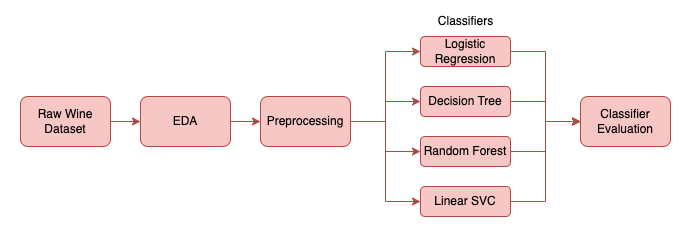

After activating my instance I just followed the steps from the Module 'Analysing Data with PySpark'. And then in the jupyter notebook I ran the below cell to verify that Spark is running

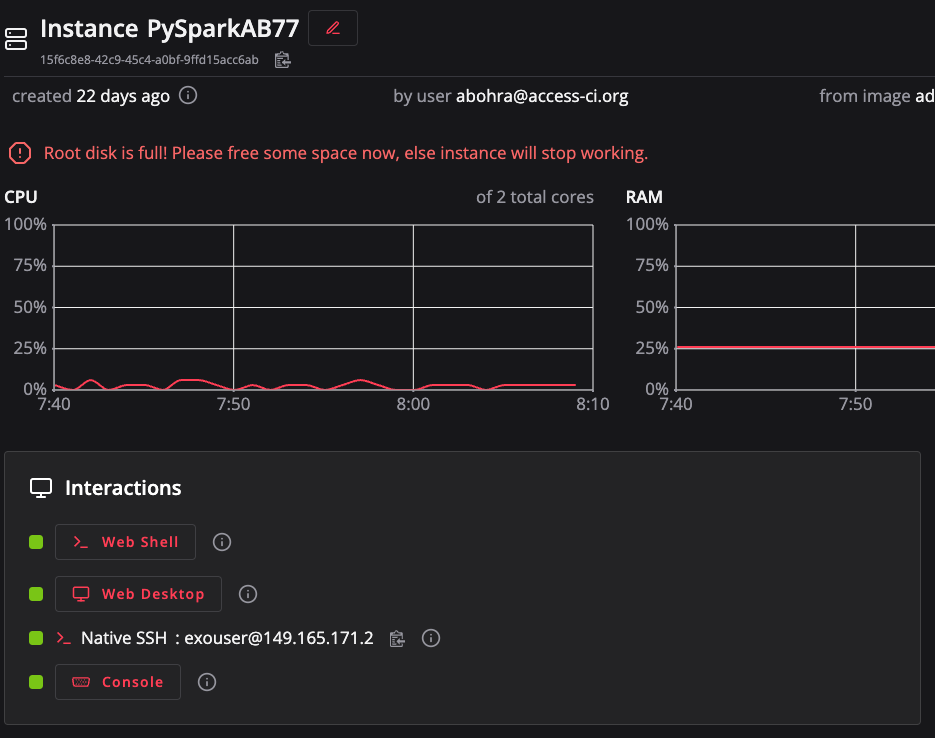

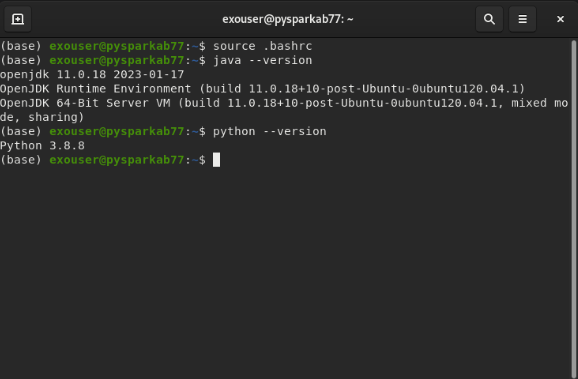

In [1]:
import findspark
findspark.init()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Wine Quality EDA').getOrCreate()

wine_df = spark.read.csv('WineQT.csv', header=True, inferSchema=True)

23/05/01 17:39:26 WARN Utils: Your hostname, Azizs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.187 instead (on interface en0)
23/05/01 17:39:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/01 17:39:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
wine_df.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)
 |-- Id: integer (nullable = true)



In [5]:
wine_df.describe().show()

23/05/01 17:39:36 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|     fixed acidity|   volatile acidity|        citric acid|    residual sugar|          chlorides|free sulfur dioxide|total sulfur dioxide|             density|                pH|         sulphates|           alcohol|           quality|               Id|
+-------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|              1143|               1143|               1143|              1143|               1143|               1143|                1143|                1143|              1143|              1143| 

In [6]:
wine_df.groupBy('quality').count().show()

+-------+-----+
|quality|count|
+-------+-----+
|      6|  462|
|      3|    6|
|      5|  483|
|      4|   33|
|      8|   16|
|      7|  143|
+-------+-----+



#### Exploratory Data Analysis
</br>
Spark provides distributed SQL querying in addition to data processing. It speeds up the unmodified Hadoop Hive searches by a very high margin on existing deployments and data. Following are some of the Spark SQL Queries below:


In [7]:
wine_df.createOrReplaceTempView('wine')

In [8]:
from pyspark.sql.functions import avg
spark.sql("SELECT quality, AVG(alcohol) AS avg_alcohol FROM wine GROUP BY quality").show()

+-------+------------------+
|quality|       avg_alcohol|
+-------+------------------+
|      6|10.655339105339111|
|      3| 9.691666666666668|
|      5|  9.90227743271222|
|      4|10.260606060606062|
|      8|           11.9375|
|      7|11.482634032634024|
+-------+------------------+



In [9]:
spark.sql("SELECT MIN(pH) AS min_pH, MAX(pH) AS max_pH, AVG(pH) AS avg_pH FROM wine WHERE quality >= 7").show()

+------+------+------------------+
|min_pH|max_pH|            avg_pH|
+------+------+------------------+
|  2.88|  3.78|3.2824528301886784|
+------+------+------------------+



In [10]:
spark.sql("SELECT COUNT(*) AS count FROM wine WHERE quality >= 7 AND alcohol > 12 AND pH < 3.5").show()

+-----+
|count|
+-----+
|   35|
+-----+



In [11]:
from pyspark.sql.functions import col
wine_df = wine_df.drop(col('id'))

Correlation matrix

Features like density and fixed acidity/citric acid, free_sulphur_dioxide and total_sulphur_dioxide are the ones with the highest correlation. It is important to note that high correlation between features can lead to multicollinearity, which can affect the performance of certain machine learning algorithms. In this case, it may be necessary to remove one of the highly correlated features to avoid redundancy in the model. We will see ahead.

23/05/01 17:39:46 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


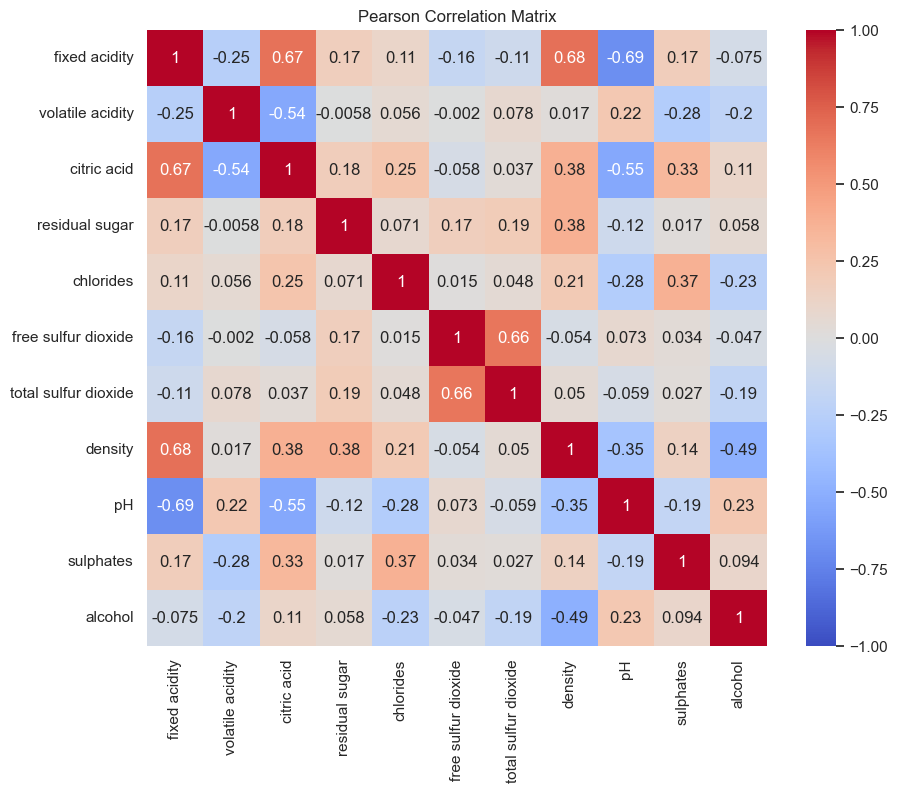

In [12]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

assembler = VectorAssembler(inputCols=wine_df.columns[:-1], outputCol="features")
corr_df = assembler.transform(wine_df).select("features")
pearson_corr = Correlation.corr(corr_df, "features", "pearson").collect()[0][0]

# Plot the correlation matrix
corr_pd = pearson_corr.toArray().tolist()
corr_pd = [[float(c) for c in row] for row in corr_pd]
cols = wine_df.columns[:-1]
corr_pd = pd.DataFrame(corr_pd, columns=cols, index=cols)

plt.figure(figsize=(10,8))
sns.heatmap(corr_pd, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix")
plt.show()

Visualizing the distribution of the features with the help of Histogram

By examining the shape of the distribution, we can also gain insight into the underlying structure of the data and identify any potential biases or trends that may be present. This information can be useful in selecting appropriate modeling techniques and evaluating the performance of the model. 
Most of the features if we observe carefully are **normally distributed**

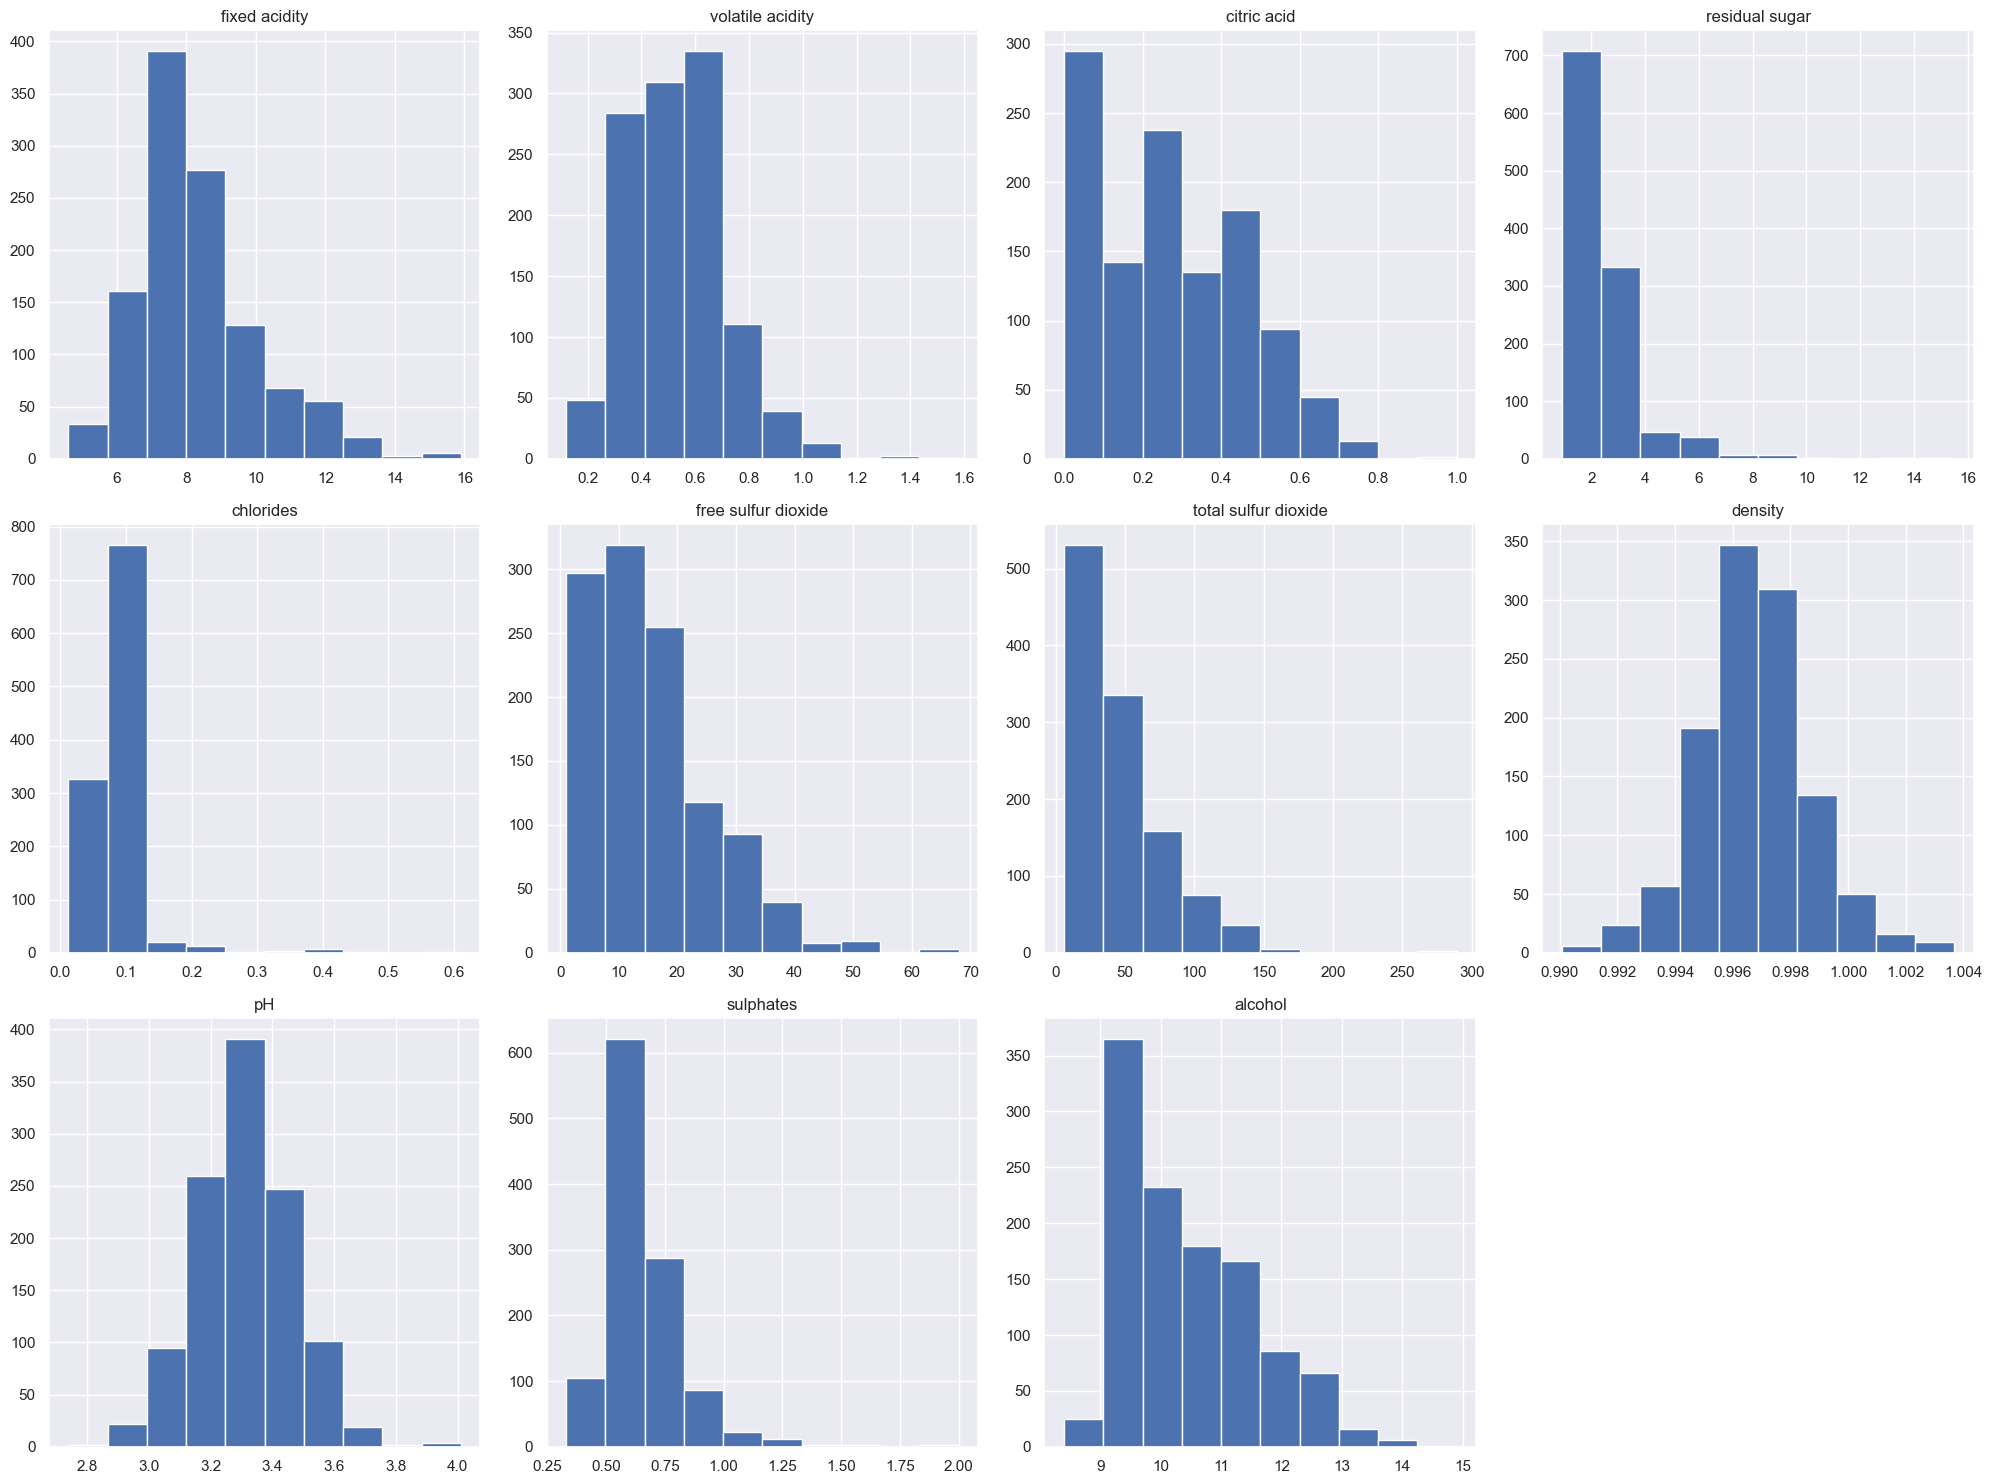

In [13]:
import matplotlib.pyplot as plt

nrows = 3
ncols = 4

fig = plt.figure(figsize=(20, 15))

for i, col in enumerate(wine_df.columns[:-1]):
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.hist(wine_df.select(col).rdd.flatMap(lambda x: x).collect())
    ax.set_title(col)

plt.tight_layout()
plt.show()

Scatter Plot (pH vs Density)

The circular pattern observed in the scatter plot of pH vs density suggests that there may be a correlation between these two variables. This could imply that as the pH level of the wine increases, the density decreases, or vice versa. However, we have seen above in the correlation matrix their correlation value is -3.7. So to draw any conclusion at this point would be inappropriate. 

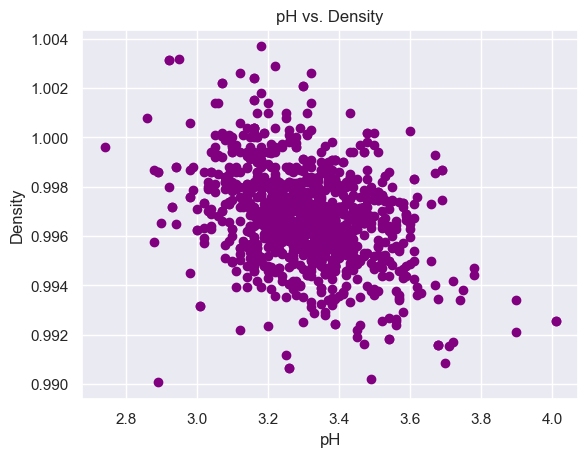

In [14]:
x = wine_df.select('pH').rdd.flatMap(lambda x: x).collect()
y = wine_df.select('density').rdd.flatMap(lambda x: x).collect()
plt.scatter(x, y, color='purple')
plt.title("pH vs. Density")
plt.xlabel("pH")
plt.ylabel("Density")
plt.show()

Pie Chart

Here we can clearly see that the target variable in our dataset is not distributed equally. We have more samples for the quality ratings of 5 and 6 than for the ratings of 3, 4, 7, 8, and 9. This suggests we have an imabalanced dataset and need to be cautious about it.

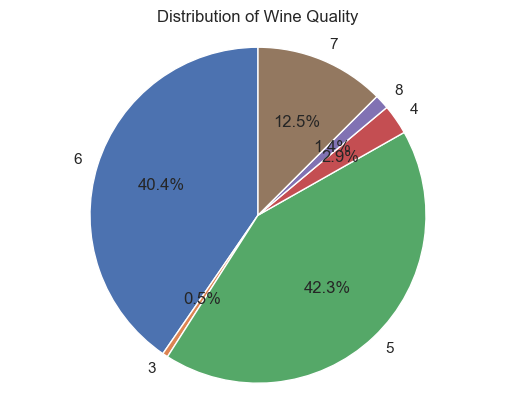

In [15]:
quality_counts = wine_df.groupBy('quality').count().collect()

# Create a pie chart of the count of each quality level
labels = [str(row['quality']) for row in quality_counts]
sizes = [int(row['count']) for row in quality_counts]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribution of Wine Quality")
plt.show()

In [16]:
from time import time
from datetime import timedelta
from colorama import Fore, Style

import math
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cmap
import matplotlib.colors as mpl_colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import warnings

def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

palette = ['#b4d2b1', '#568f8b', '#774fa8', '#c73266', '#fcba03', '#d15252']
palette_rgb = [hex_to_rgb(x) for x in palette]
cmap = mpl_colors.ListedColormap(palette_rgb)
colors = cmap.colors
bg_color= 'white'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params
)

warnings.simplefilter("ignore", UserWarning)

The plot depicts the results of counting all records in each group with a z-score more than 2, indicating outliers (observations more than 2 standard deviations from the mean). Basically here we are trying to figure outliers.

*This graph is adopted from a Kaggle Practioner's Notebook (https://www.kaggle.com/code/jcaliz/ps-s03e05-a-complete-eda)*. I really liked the way this graph was built and hence decided to incorporate it.

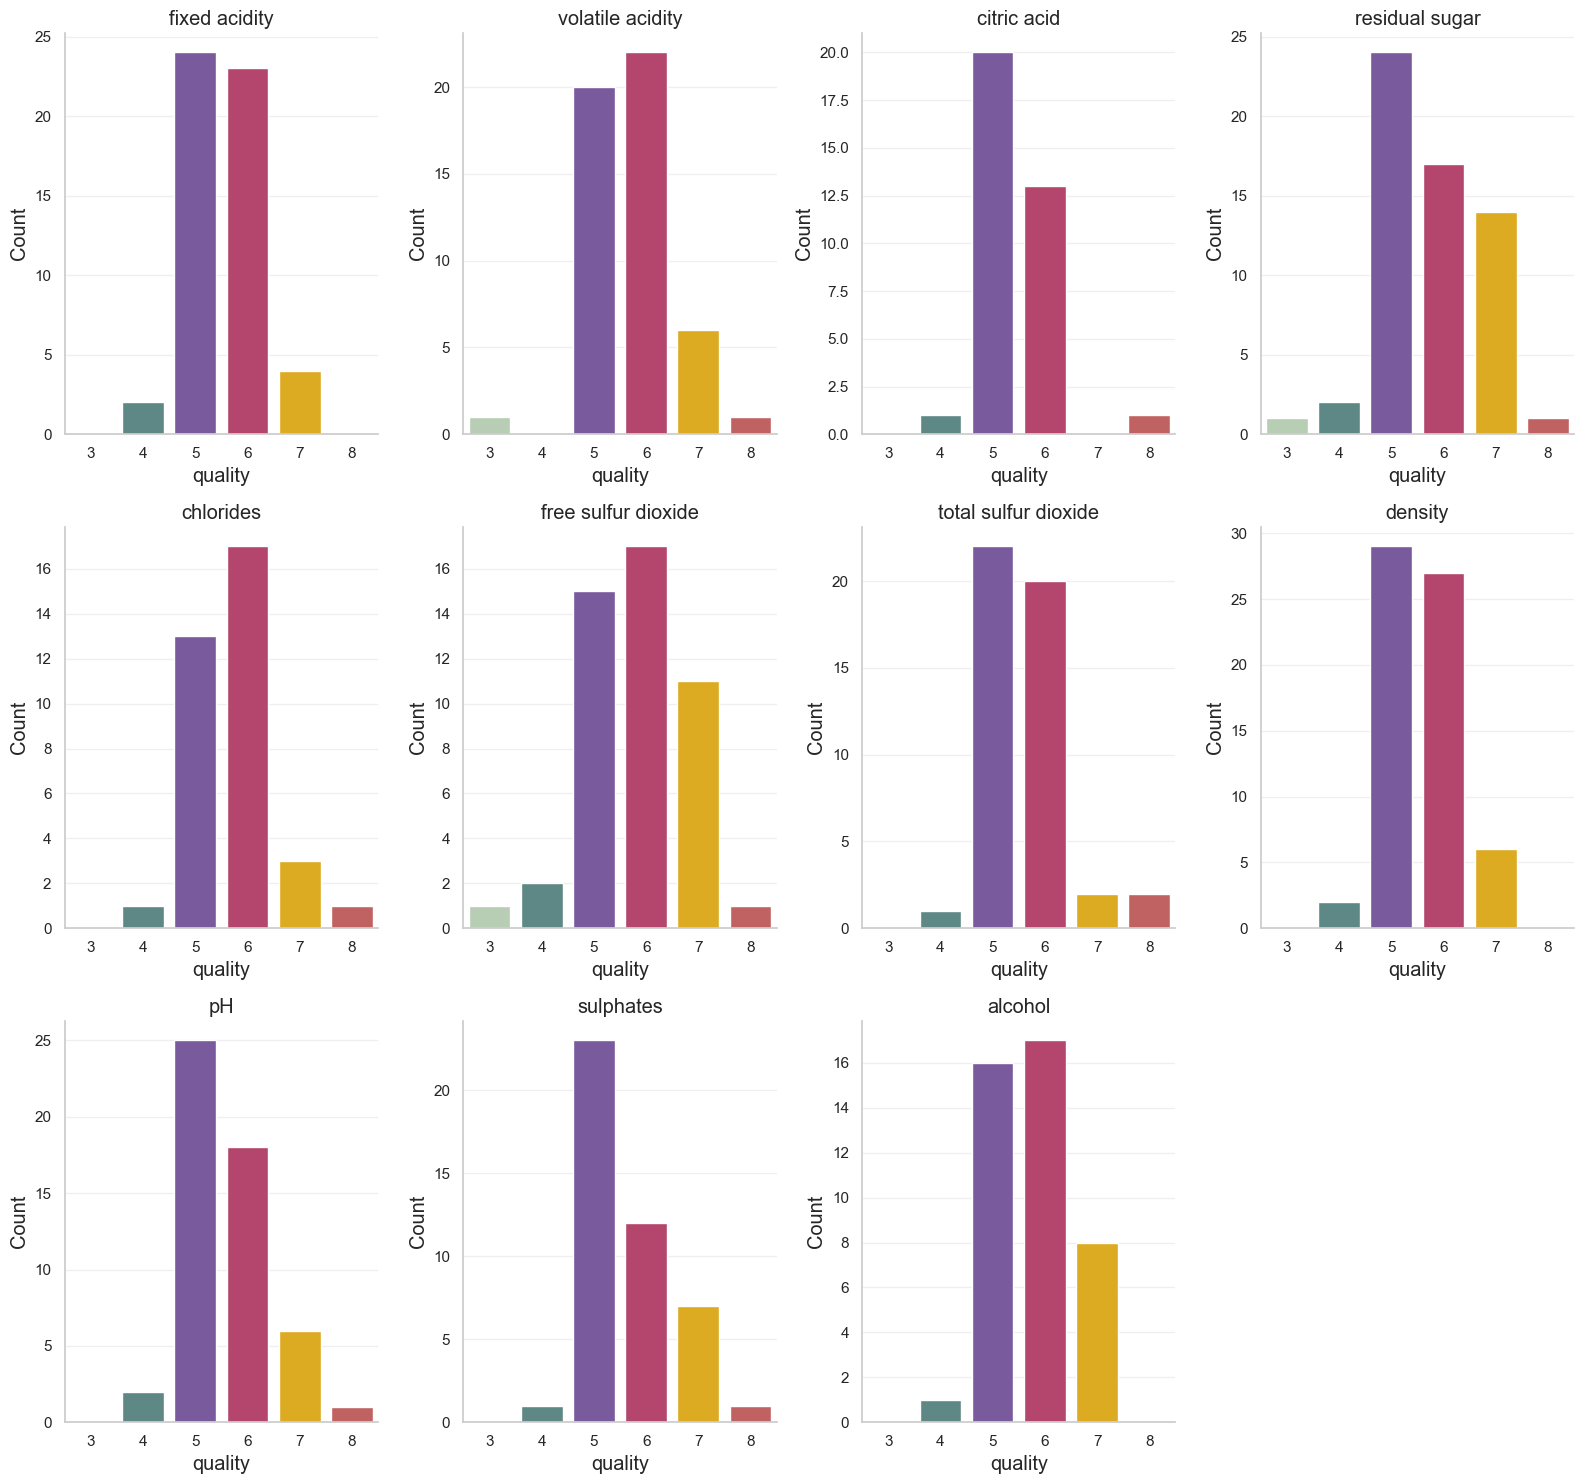

In [17]:
from scipy.stats import zscore
wine_pd_df = wine_df.toPandas()
columns = wine_pd_df.columns[:-1]

features = wine_pd_df.columns[:-1]
z_scores = wine_pd_df[features]
z_scores = z_scores.groupby(wine_pd_df.quality, group_keys=False).apply(zscore)
outliers = z_scores.abs().ge(2).groupby(wine_pd_df.quality).sum()

n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.barplot(x=outliers.index, y=outliers[feature], ax=ax[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title(feature)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
plt.tight_layout()

Box Plot

Plotting this had a reason to clearly visualize the distribution of all the features and as well as the outliers. And we can see there are many outliers in almost every attribute and we cannot take this lightly. However, the outliers are not so much visible so we can count them. Therefore, in the next step we will try to figure out the exact number of outlier in each attribute.

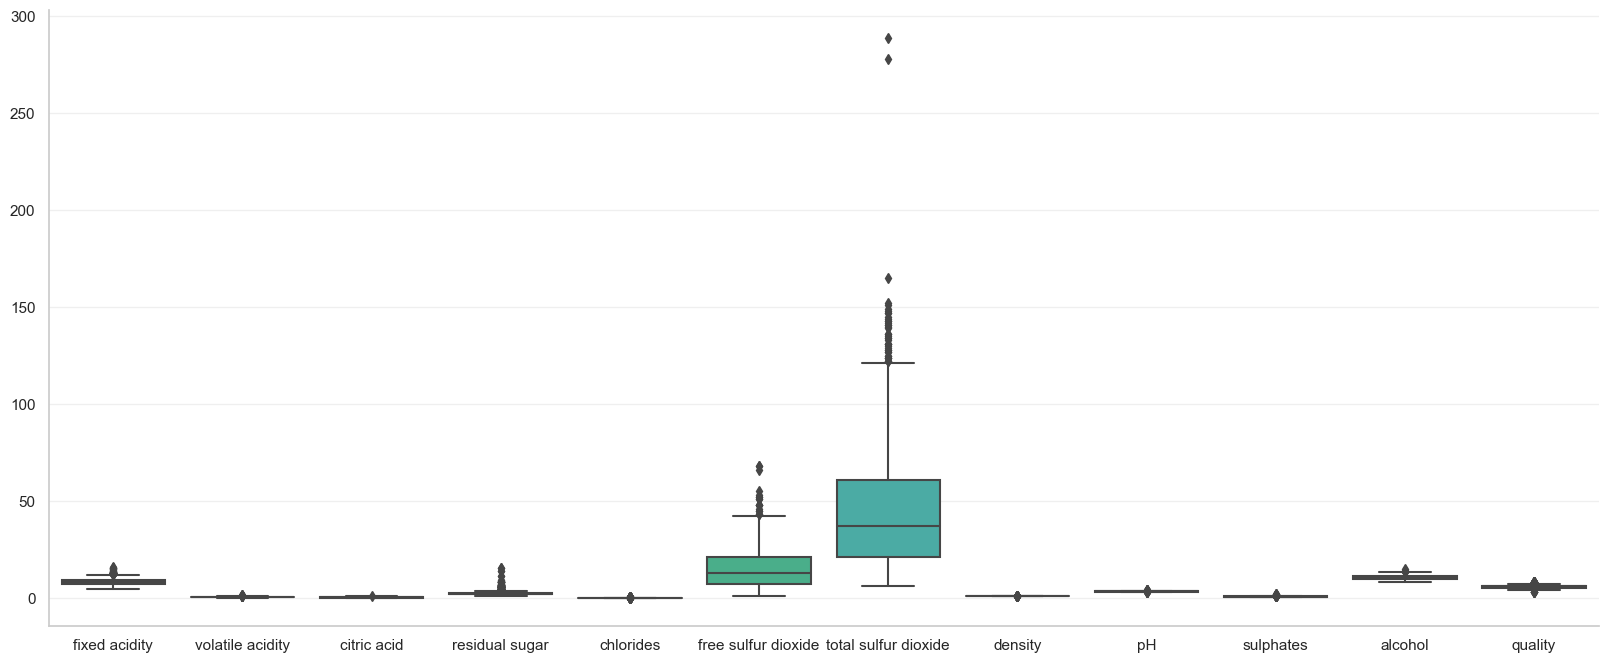

In [18]:
plt.figure(figsize=(20,8))
sns.boxplot(data=wine_pd_df)
plt.show()

Getting exact # for the outliers from each column 

In [19]:
import pyspark.sql.functions as F

def count_outliers(col):
    q1, q3 = wine_df.approxQuantile(col, [0.25, 0.75], 0.01)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return wine_df.filter((wine_df[col] < lower_bound) | (wine_df[col] > upper_bound)).count()

for col in wine_df.columns:
    num_outliers = count_outliers(col)
    print(f"Column {col} has {num_outliers} outliers")


Column fixed acidity has 44 outliers
Column volatile acidity has 14 outliers
Column citric acid has 1 outliers
Column residual sugar has 110 outliers
Column chlorides has 77 outliers
Column free sulfur dioxide has 18 outliers
Column total sulfur dioxide has 50 outliers
Column density has 35 outliers
Column pH has 20 outliers
Column sulphates has 45 outliers
Column alcohol has 12 outliers
Column quality has 22 outliers


#### Data Preprocessing
</br>
The goal here was to deal with missing values and duplicates. Fortunately, this dataset has no missing values and no duplicates!!!

However, we can see there are many outliers, dealing with them has become necessary before pushing the data through the model and for any further analysis. This is done using **Winsorizing**. The technique used to handle outliers by modifying the extreme values of a variable to be equal to some other specified value within a certain range. This can help reduce the impact of outliers on statistical analyses and models.

In [20]:
from pyspark.sql.functions import mean, when, col

# Replace missing values with mean
# wine_df = wine_df.fillna(wine_df.select([mean(c).alias(c) for c in wine_df.columns if c != 'id']))

# Removing duplicates
# wine_df = wine_df.dropDuplicates()

# Removing outliers
from pyspark.sql.functions import col

# Winsorizing technique implemented using this function on the dataset
def winsorize_col(df, col_name, whisker):
    quantiles = df.approxQuantile(col_name, [whisker, 1-whisker], 0.05)
    lower_whisker = quantiles[0]
    upper_whisker = quantiles[1]
    return df.withColumn(col_name, when(col(col_name) < lower_whisker, lower_whisker)\
            .when(col(col_name) > upper_whisker, upper_whisker)\
            .otherwise(col(col_name)))


cols = wine_df.columns
whisker = 0.05
for col_name in cols:
    wine_df = winsorize_col(wine_df, col_name, whisker)


In [21]:
# Splitting the dataset for training and testing

train_df, test_df = wine_df.randomSplit([0.8, 0.2], seed=42)

**VectorAssembler** is a PySpark transformer that creates a single vector column from numerous columns of a DataFrame. It takes a list of input column names and creates a new column that is a dense vector containing all of the input columns. To integrate all the features into a single feature vector that can be used as input for machine learning models, this is frequently employed in machine learning pipelines.


In [22]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=wine_df.columns[:-1], outputCol='features')

train_df = assembler.transform(train_df)
test_df = assembler.transform(test_df)

**Standardizing** the data to ensure that each feature has the same scale and range, which will help our machine learning algorithms converge more quickly and make it easier to compare the relative importance of different features. Additionally, it will help prevent features with large scales from dominating the model or introducing bias.

In [23]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol='features', outputCol='scaled_features')

scaler_model = scaler.fit(train_df)

train_df = scaler_model.transform(train_df)
test_df = scaler_model.transform(test_df)

In [24]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

threshold = 5.0

udf_classify = udf(lambda x: 1.0 if x >= threshold else 0.0, DoubleType())

train_df = train_df.withColumn('label', udf_classify('quality'))
test_df = test_df.withColumn('label', udf_classify('quality'))


#### Modelling
</br>

Machine Learning Pipeline

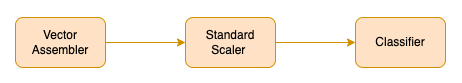

1) OneVsRest using Logistic Regression as a Classifier

In [25]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)
ovr = OneVsRest(classifier=lr)

pipeline_ovr = Pipeline(stages=[assembler,scaler, ovr])
ovrModel = pipeline_ovr.fit(train_df)

predictions = ovrModel.transform(test_df)

evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9545502119420168


2) Random Forest Classiefier

In [26]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=170, maxDepth=5)
pipeline_rf = Pipeline(stages=[assembler, scaler, rf])
model = pipeline_rf.fit(train_df)

predictions = model.transform(test_df)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9695431472081218


3) Linear Support Vector Classifier

In [27]:
from pyspark.ml.classification import LinearSVC

lsvc = LinearSVC(labelCol="label", featuresCol="features")
pipeline_lsvc = Pipeline(stages=[assembler, scaler, lsvc])
model = pipeline_lsvc.fit(train_df)
predictions = model.transform(test_df)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9400139142982298


4) Decision Tree Classifier

In [28]:
from pyspark.ml.classification import OneVsRest, DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=17)
pipeline_dt = Pipeline(stages=[assembler, scaler, dt])
model = pipeline_dt.fit(train_df)

predictions = model.transform(test_df)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9495251998982093


### 4. Results



| Classifiers | Accuracy % |
| :-: | :-: |
| OvR with Logistic Regression | 95.45 |
| Random Forest | 96.95 |
| Linear SVC | 94.00 |
| Decision Tree | 94.94 |


In this project, we applied various machine learning algorithms such as OneVsRest, Random Forest, Linear SVC, and Decision Tree to predict the quality of wine using the wine dataset.

The results showed that Random Forest performed the best with an accuracy of 96.95%, followed by OneVsRest with an accuracy of 95.45%. Decision Tree and Linear SVC had accuracies of 94.94% and 94.00%, respectively.

The Random Forest algorithm had the highest accuracy among all the models, which suggests that it was able to capture the **complex relationships** between the features and the target variable better than the other algorithms. The fact that Random Forest is an **ensemble method** that *combines* various decision trees to create predictions is one rationale for its great performance. This can lower the chance of overfitting and increase the model's accuracy. Additionally, Random Forest has the advantage over some other algorithms in that it can *handle* both categorical and numerical data.

The OneVsRest algorithm can be seen as a *generalization* of binary classification, where the classification task is transformed into **multiple binary classification** tasks. The algorithm works by training a separate binary classifier for each class, with the samples from that class labeled as positive and all other samples labeled as negative. It is worth noting that the OvR algorithm has some advantages over logistic regression. One advantage is that it can handle multi-class classification *problems* more effectively than logistic regression. Another advantage is that it can handle **non-linear decision boundaries** more effectively than logistic regression.

Random Forest and OneVsRest outperformed Decision Tree and Linear SVC in terms of performance. The lower accuracy score may be explained by the fact that Decision Tree is a straightforward algorithm that is easily **overfit**. Although the linear SVC model is known to perform well on high-dimensional data, our dataset has a relatively small number of features, so it might not be the best option.

Overall, the findings of our models point to **Random Forest and OneVsRest** as viable solutions to the categorization of wine quality issue. 
The results of this project could be useful for wine manufacturers to predict the quality of their wine based on various chemical properties.

### 5. Discussion


First, in terms of the performance of the models, we must realize that accuracy is not always the best metric to assess classification model performance. When dealing with imbalanced datasets where the amount of samples in each class is noticeably different, we should additionally take other metrics like precision, recall, and F1 score into consideration. It is crucial to remember that our dataset is not balanced, which means that certain classes have more samples than others. Our models' performance may be impacted by this since they may be biased towards the majority class and have trouble identifying the minority class.

With regard to our difficulty of classifying the quality of wine, we have more samples for the quality ratings of 5 and 6 than for the ratings of 3, 4, 7, 8, and 9. Because the models might not have access to enough data to learn their distinctive features, this could potentially lead to lower accuracy scores for the minority classes.

We might think about balancing our dataset using methods like over or undersampling to address this problem. Undersampling entails deleting samples from the majority class, and oversampling entails adding more samples for the minority class. Synthetic data generation, which creates new data points from already-existing data points, is another method that might be used.

Important thing to remember that these methods should only be used with care because both oversampling and undersampling can result in information loss. Oversampling can cause overfitting. Furthermore, these methods should be assessed on a case-by-case basis because they might not always improve the performance of our models.



As discussed in the methodology, we were aiming to accomplish several tasks with which could we can develop a scalable, efficient and distributed application which can accurately predict wine quality. And now since we have accomplish those tasks, I would like to discuss how these tasks were approached and completed.

Starting with the "Lifecycles and Pipelines" module, I incorporated the ML pipeline (Vector Assembler -> Standard Scalar -> Classifier) due to which the data goes in a sequential manner and data leakage possibility gets out of the picture. Our project made extensive use of the pipeline that included the Vector Assembler, Standard Scalar, and Classifier. The Vector Assembler phase made it simple to add or remove features without altering the future code and allowed us to compile all the features into a single vector, which is necessary for most machine learning methods. Ahead, pipeline allowed us to normalize and standardize the data, and easily switch between different classifiers without modifying the code. This streamlined the process of exploring different algorithms and hyperparameters, resulting in better performance and more accurate predictions.

Then comes Apache Spark in the picture from "Processing and Analytics" Module. I was familar with the machine learning approaches, pandas dataframes, numpy arrays, etc. but having my hands-on-practice with PySpark, I was really intrigued during the coursework. And to make this application handle parallel multiple request, I was in no doubt to use this in my project. PySpark provided us the freedom to extend this project in a way when the dataset we have consists of large volumes of information, it would have been really difficult with the traditional ML techniques. It also provided us with ML algorithms in a much more simpler way and allowed us to experiment with our pipelines easily. And not to forget this can be easily integrated with big data tools like Hadoop, Hive and Cassandra.

Lastly, I will remain grateful to the services provided by Jetstream2 Platform. Because of this platform, I didn't have to install or setup any libraries/software priorly, since PySpark, JDK runtime and other useful libraries comes preinstalled. And because of this platform, I got the practice of creating and enabling virtual environments and loading huge volume of data simply as instructed in the "Virtualization" Module of this course. And during the deployment phase of this application, Jetstream2 would come handy and ease the whole process.

**Problems Faced**

One of the challenges faced during this project was that once I fitted the model(any), I wasn't able to re-run it and got numerous errors. To try tweaking hyperparameters of any of the model, I had to restart the kernel and run all the cells from the start. This consumed a lot of time since I was unable to figure out the fix.

Second thing which gave me a hard time was overfitting of Decision Tree Classifer. This model yielded 100% accuracy so many times, at a point I was on the verge of giving up and let the model be as it is. But then, I realized I was not fitting the data with pipeline object but with classifier object. After running it through the pipeline I got 94% accuracy which was reasonable. According to me this was just the case because there might be data leakage and the model was estimating very optimistically.

### 6. Conclusion

In this project, I aimed to make an attempt in developing an application which can predict wine quality accurately based on the Wine Quality Dataset (from Kaggle) abd utilizing the modules that were taught during the coursework to make this more realistic and practical using virtualization and distributed computing. Comparitive analysis of four machine learning classifiers was performed, with Random Forest yielding accuracy of 96.95% following OvR with 95.45%. Due to highly imbalanced dataset, it is likely that all models would perform better if more attributes regarding wine were available in the datset. Future work for this would be evaluating the models on other metrics on balanced dataset. Also, the wine quality prediction models could be incorporated into a bigger framework that proposes wines based on user preferences or suggests meal pairings. This could entail matching wines with particular tastes or cuisines using clustering or recommendation algorithms, and could potentially improve the wine selection process for customers.

### 7. References


1) Piyush Bhardwaj, Parul Tiwari, Kenneth Olejar, Wendy Parr, Don Kulasiri, "A machine learning application in wine quality prediction", Machine Learning with Applications,Volume 8, 2022
2) https://www.kaggle.com/code/jcaliz/ps-s03e05-a-complete-eda
3) https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html
4) https://www.kaggle.com/code/georgyzubkov/wine-quality-exploratory-data-analysis-ml
5) https://rstudio-pubs-static.s3.amazonaws.com/297387_efdd313a1ae2446595fe964fa4f16d66.html
6) https://spark.apache.org/docs/1.5.2/ml-guide.html